In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import string as str
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
Bank=pd.read_csv(r"C:\Users\Dell\Downloads\bank_marketing_updated_v1.csv")

In [3]:
Bank

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month  \
0          yes      no     yes   no    unknown    5  may, 2017   
1          yes      no     yes   no    unknown    5  may, 2017   
2          yes      no     yes  yes    unknown    5  may, 2017   
3           no      no     yes   no    unknown    5  may, 2017   
4           no      no      no   no    unknown    5  may, 2017   
...        ...     ...     ...  ...        ...  ...        ...   
45206      yes      no      no   no   cellular   17  nov, 2017   
45207      yes      no      no   no   cellular   17  nov, 2017   
45208      yes      no      no   no   cellular   17  nov, 2017   
45209      yes      no      no   no  telephone   17  nov, 2017   
45210      yes      no      no   no   cellular   17  nov, 2017   

                   duration  campaign  pdays  previous poutcome response  
0                   261 sec         1     -1         0  unknown       no  
1                   151 sec         1     -1         0  unknown       no  
2                    76 sec         1     -1         0  unknown       no  
3                    92 sec         1     -1         0  unknown       no  
4                   198 sec         1     -1         0  unknown       no  
...                     ...       ...    ...       ...      ...      ...  
45206  16.2833333333333 min         3     -1         0  unknown      yes  
45207               7.6 min         2     -1         0  unknown      yes  
45208  18.7833333333333 min         5    184         3  success      yes  
45209  8.46666666666667 min         4     -1         0  unknown       no  
45210  6.01666666666667 min         2    188        11    other       no  

[45211 rows x 19 columns]

In [4]:
Split_data = Bank["jobedu"].str.split(',', expand=True)

In [5]:
Split_data.columns = ['job', 'edu']
Bank= pd.concat([Bank, Split_data], axis=1)
Bank.to_csv('output.csv', index=False)

In [6]:
Bank

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan  ... day      month              duration  \
0          yes      no     yes   no  ...   5  may, 2017               261 sec   
1          yes      no     yes   no  ...   5  may, 2017               151 sec   
2          yes      no     yes  yes  ...   5  may, 2017                76 sec   
3           no      no     yes   no  ...   5  may, 2017                92 sec   
4           no      no      no   no  ...   5  may, 2017               198 sec   
...        ...     ...     ...  ...  ...  ..        ...                   ...   
45206      yes      no      no   no  ...  17  nov, 2017  16.2833333333333 min   
45207      yes      no      no   no  ...  17  nov, 2017               7.6 min   
45208      yes      no      no   no  ...  17  nov, 2017  18.7833333333333 min   
45209      yes      no      no   no  ...  17  nov, 2017  8.46666666666667 min   
45210      yes      no      no   no  ...  17  nov, 2017  6.01666666666667 min   

      campaign  pdays  previous  poutcome response           job        edu  
0            1     -1         0   unknown       no    management   tertiary  
1            1     -1         0   unknown       no    technician  secondary  
2            1     -1         0   unknown       no  entrepreneur  secondary  
3            1     -1         0   unknown       no   blue-collar    unknown  
4            1     -1         0   unknown       no       unknown    unknown  
...        ...    ...       ...       ...      ...           ...        ...  
45206        3     -1         0   unknown      yes    technician   tertiary  
45207        2     -1         0   unknown      yes       retired    primary  
45208        5    184         3   success      yes       retired  secondary  
45209        4     -1         0   unknown       no   blue-collar  secondary  
45210        2    188        11     other       no  entrepreneur  secondary  

[45211 rows x 21 columns]

In [7]:
Bank.shape

(45211, 21)

In [8]:
Bank.ndim

2

In [9]:
Bank.size

949431

In [10]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job         45211 non-nul

In [11]:
Bank.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
edu            0
dtype: int64

<Axes: ylabel='age'>

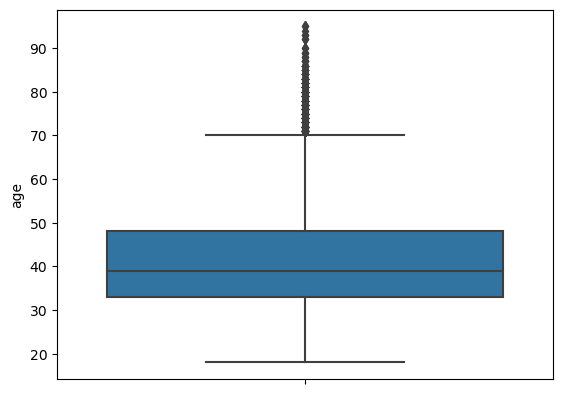

In [12]:
sns.boxplot(y='age',data=Bank)

In [13]:
Bank["age"].fillna(Bank["age"].median(),inplace=True)

In [14]:
Bank.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
edu            0
dtype: int64

In [15]:
Bank["month"].value_counts()

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

In [16]:
Bank[Bank["month"].isnull()]

customerid   age  salary  balance   marital                  jobedu  \
189           190  31.0  100000        0    single     management,tertiary   
769           770  39.0   20000      245   married     blue-collar,primary   
860           861  33.0   55000      165   married       retired,secondary   
1267         1268  36.0   50000      114   married        admin.,secondary   
1685         1686  34.0   20000      457   married   blue-collar,secondary   
1899         1900  49.0   16000      164  divorced       housemaid,primary   
2433         2434  26.0   60000     3825   married     technician,tertiary   
2612         2613  38.0   50000      446    single          admin.,unknown   
2747         2748  48.0  120000     2550   married    entrepreneur,unknown   
3556         3557  41.0   20000       59   married   blue-collar,secondary   
3890         3891  56.0   55000     4391   married         retired,unknown   
5311         5312  22.0   20000        0    single   blue-collar,secondary   
6265         6266  32.0   50000       13    single        admin.,secondary   
6396         6397  24.0   70000        0   married       services,tertiary   
8433         8434  38.0   60000    12926    single    technician,secondary   
8792         8793  24.0   50000      262   married        admin.,secondary   
10627       10628  45.0   60000      533   married     technician,tertiary   
11016       11017  46.0   70000      741   married        services,primary   
11284       11285  44.0   16000     1059    single       housemaid,primary   
11394       11395  54.0   60000      415   married    technician,secondary   
14502       14503  35.0   70000      819   married      services,secondary   
15795       15796  38.0   20000      -41   married     blue-collar,primary   
16023       16024  35.0   60000      328   married     technician,tertiary   
16850       16851  45.0   55000       25   married         retired,primary   
17568       17569  56.0   70000        0   married        services,unknown   
18431       18432  42.0   70000      247    single      services,secondary   
18942       18943  49.0   50000      949   married        admin.,secondary   
19118       19119  38.0   50000     1980   married         admin.,tertiary   
19769       19770  36.0  100000      162   married     management,tertiary   
21777       21778  56.0   16000      605   married       housemaid,primary   
21962       21963  36.0   60000     1044    single    technician,secondary   
23897       23898  46.0   20000      123   married     blue-collar,primary   
25658       25659  35.0   60000     8647   married  self-employed,tertiary   
27480       27481  31.0  100000     3283    single     management,tertiary   
28693       28694  26.0   16000      543   married      housemaid,tertiary   
30740       30741  32.0  100000     2770    single     management,tertiary   
31551       31552  54.0   55000      136   married         retired,primary   
35773       35774  52.0   20000       33   married     blue-collar,unknown   
37194       37195  36.0   20000     1969   married   blue-collar,secondary   
37819       37820  34.0   20000      237   married   blue-collar,secondary   
38158       38159  34.0   60000     1317  divorced     technician,tertiary   
39188       39189  30.0   60000      778    single    technician,secondary   
41090       41091  35.0  100000     7218    single     management,tertiary   
41434       41435  43.0  100000    13450   married     management,tertiary   
41606       41607  25.0  100000      808    single     management,tertiary   
43001       43002  35.0   60000      353    single  self-employed,tertiary   
43021       43022  52.0  100000     4675   married     management,tertiary   
43323       43324  54.0   70000        0  divorced      services,secondary   
44131       44132  27.0  100000      843    single    management,secondary   
44732       44733  23.0    4000      508    single        student,tertiary   

      targeted default housi

In [17]:
Bank["month"].fillna(Bank["month"].mode().iloc[0],inplace= True)

In [18]:
Bank.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
edu            0
dtype: int64

In [19]:
Bank["response"].fillna(Bank["response"].mode().iloc[0],inplace= True)

In [20]:
Bank.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
edu           0
dtype: int64

In [21]:
Bank.max(numeric_only=True)

customerid     45211.0
age               95.0
salary        120000.0
balance       102127.0
day               31.0
campaign          63.0
pdays            871.0
previous         275.0
dtype: float64

In [22]:
Bank.min(numeric_only=True)

customerid       1.0
age             18.0
salary           0.0
balance      -8019.0
day              1.0
campaign         1.0
pdays           -1.0
previous         0.0
dtype: float64

In [23]:
Bank.median(numeric_only=True)

customerid    22606.0
age              39.0
salary        60000.0
balance         448.0
day              16.0
campaign          2.0
pdays            -1.0
previous          0.0
dtype: float64

In [24]:
Bank.mean(numeric_only=True)

customerid    22606.000000
age              40.934795
salary        57006.171065
balance        1362.272058
day              15.806419
campaign          2.763841
pdays            40.197828
previous          0.580323
dtype: float64

In [25]:
Bank.corr(numeric_only=True)

customerid       age    salary   balance       day  campaign  \
customerid    1.000000  0.014922  0.039966  0.073639 -0.061465 -0.102884   
age           0.014922  1.000000  0.024366  0.097753 -0.009185  0.004851   
salary        0.039966  0.024366  1.000000  0.055469  0.027864  0.015005   
balance       0.073639  0.097753  0.055469  1.000000  0.004503 -0.014578   
day          -0.061465 -0.009185  0.027864  0.004503  1.000000  0.162490   
campaign     -0.102884  0.004851  0.015005 -0.014578  0.162490  1.000000   
pdays         0.437729 -0.023795 -0.014968  0.003435 -0.093044 -0.088628   
previous      0.271098  0.001302  0.014564  0.016674 -0.051710 -0.032855   

               pdays  previous  
customerid  0.437729  0.271098  
age        -0.023795  0.001302  
salary     -0.014968  0.014564  
balance     0.003435  0.016674  
day        -0.093044 -0.051710  
campaign   -0.088628 -0.032855  
pdays       1.000000  0.454820  
previous    0.454820  1.000000

In [26]:
Bank.std(numeric_only=True)

customerid    13051.435847
age              10.616926
salary        32085.718415
balance        3044.765829
day               8.322476
campaign          3.098021
pdays           100.128746
previous          2.303441
dtype: float64

In [27]:
Bank.describe().T

count          mean           std     min      25%      50%  \
customerid  45211.0  22606.000000  13051.435847     1.0  11303.5  22606.0   
age         45211.0     40.934795     10.616926    18.0     33.0     39.0   
salary      45211.0  57006.171065  32085.718415     0.0  20000.0  60000.0   
balance     45211.0   1362.272058   3044.765829 -8019.0     72.0    448.0   
day         45211.0     15.806419      8.322476     1.0      8.0     16.0   
campaign    45211.0      2.763841      3.098021     1.0      1.0      2.0   
pdays       45211.0     40.197828    100.128746    -1.0     -1.0     -1.0   
previous    45211.0      0.580323      2.303441     0.0      0.0      0.0   

                75%       max  
customerid  33908.5   45211.0  
age            48.0      95.0  
salary      70000.0  120000.0  
balance      1428.0  102127.0  
day            21.0      31.0  
campaign        3.0      63.0  
pdays          -1.0     871.0  
previous        0.0     275.0

<Axes: ylabel='age'>

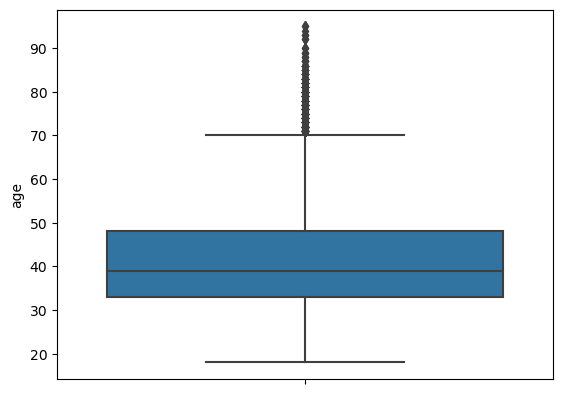

In [28]:
sns.boxplot(y='age',data=Bank)

<Axes: ylabel='salary'>

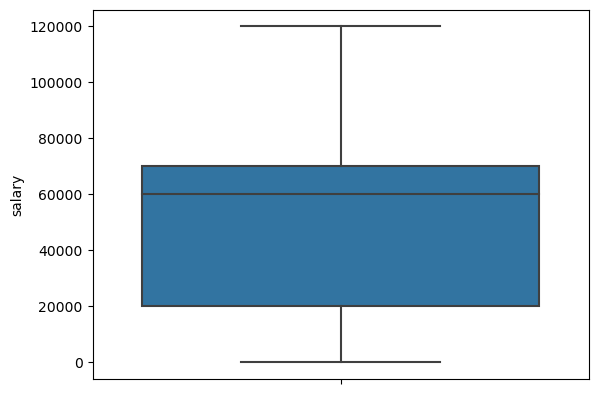

In [29]:
sns.boxplot(y='salary',data=Bank)

<Axes: ylabel='balance'>

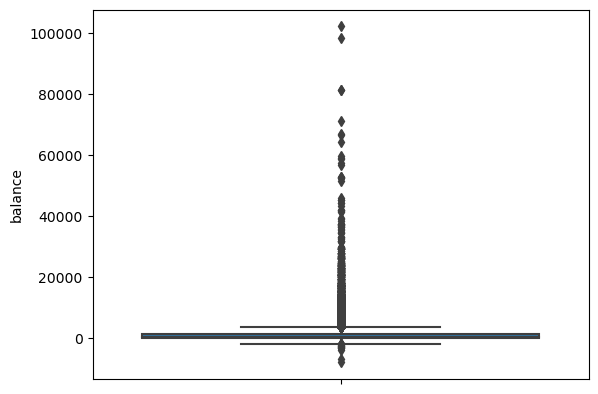

In [30]:
sns.boxplot(y='balance',data=Bank)

<Axes: ylabel='day'>

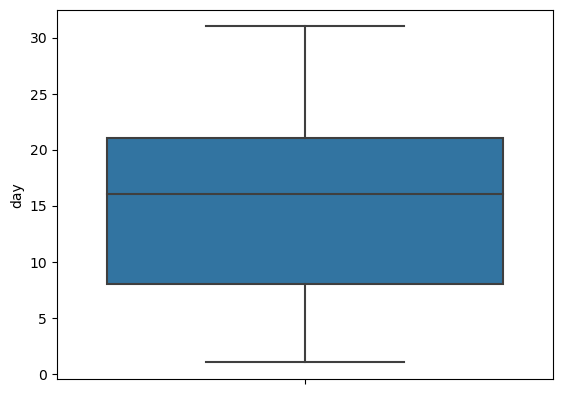

In [31]:
sns.boxplot(y='day',data=Bank)

<Axes: ylabel='campaign'>

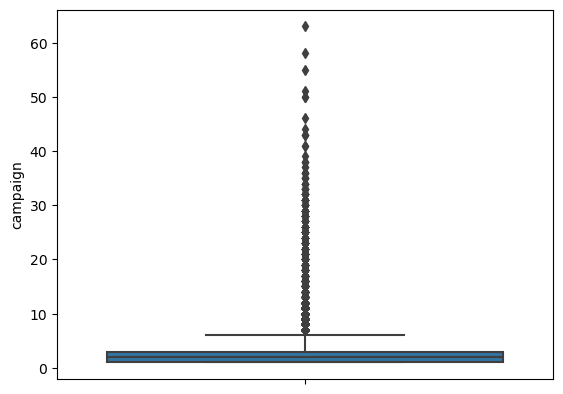

In [32]:
sns.boxplot(y='campaign',data=Bank)

<Axes: ylabel='pdays'>

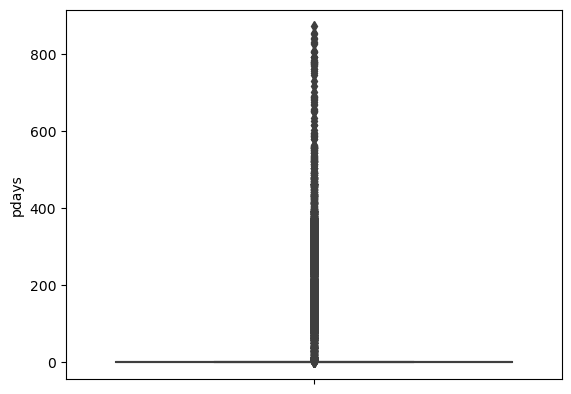

In [33]:
sns.boxplot(y='pdays',data=Bank)

<Axes: ylabel='previous'>

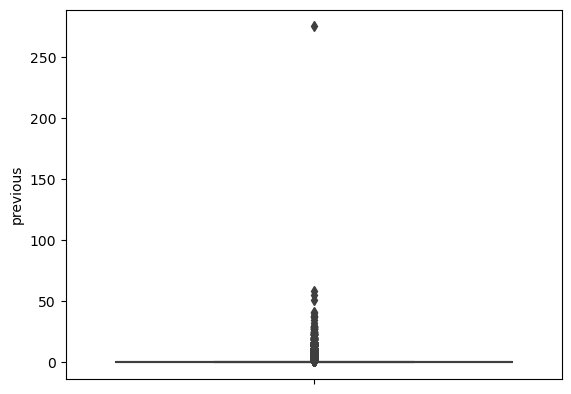

In [34]:
sns.boxplot(y='previous',data=Bank)

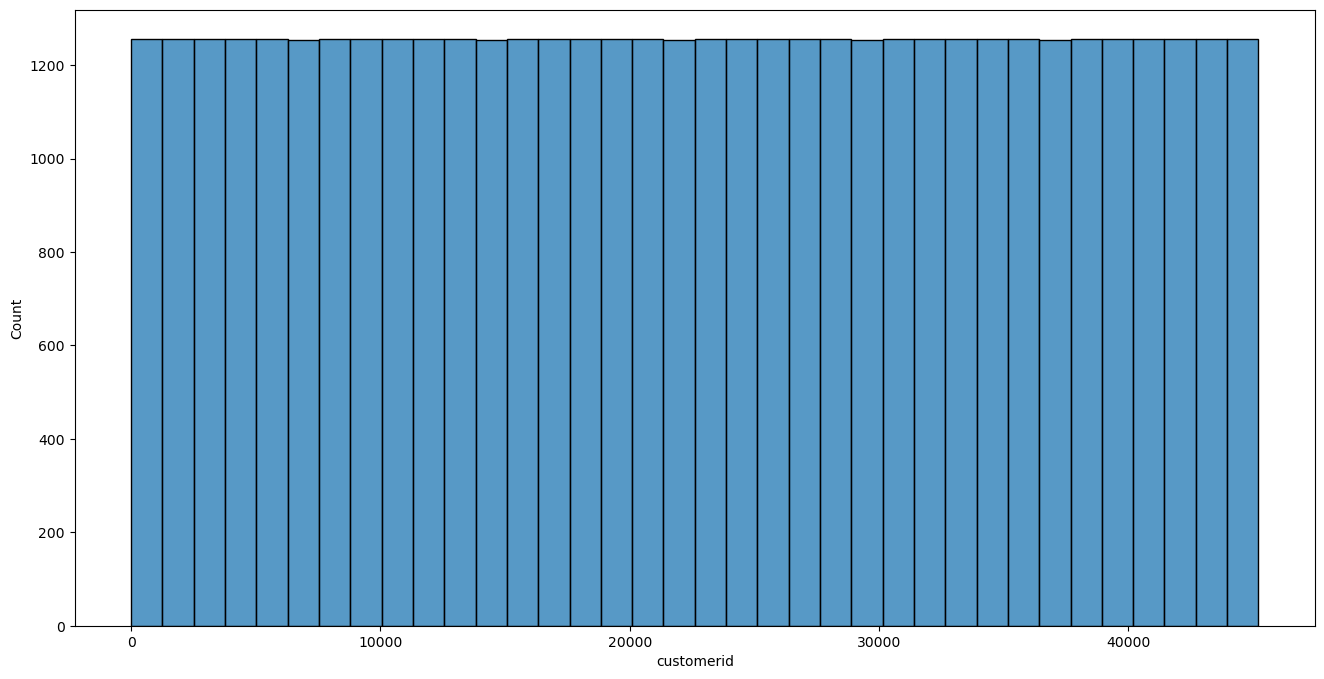

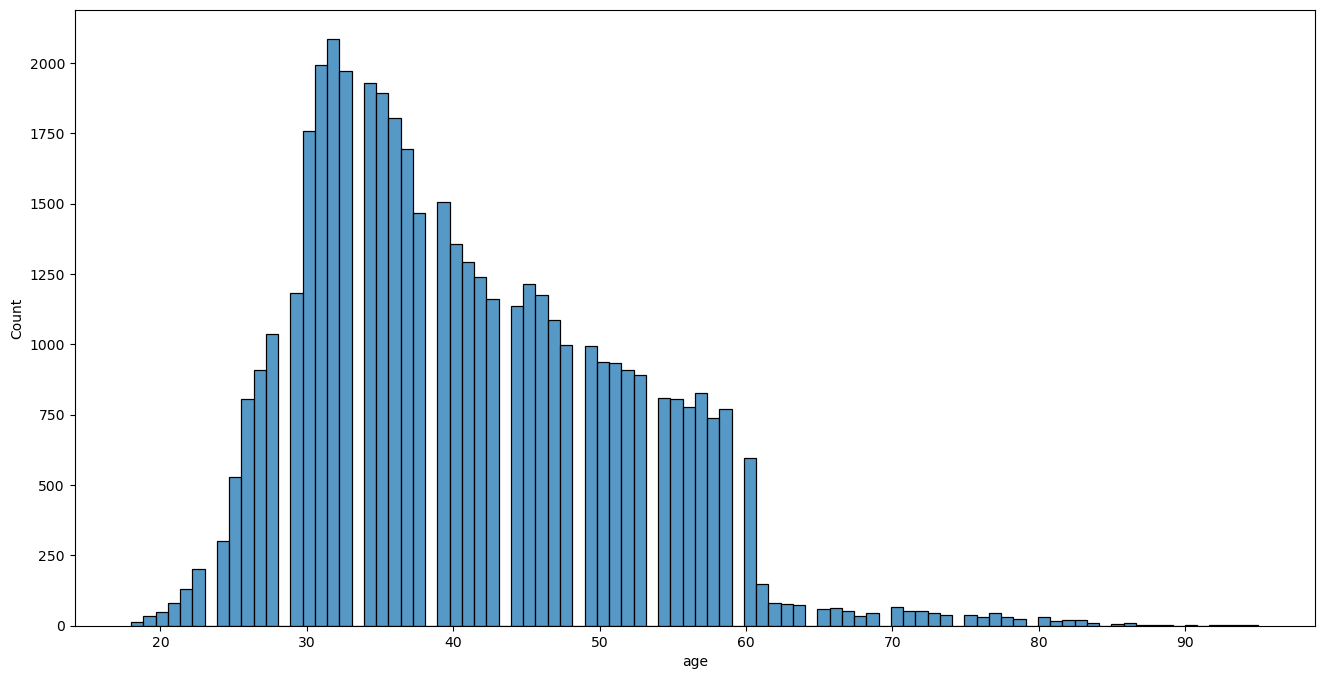

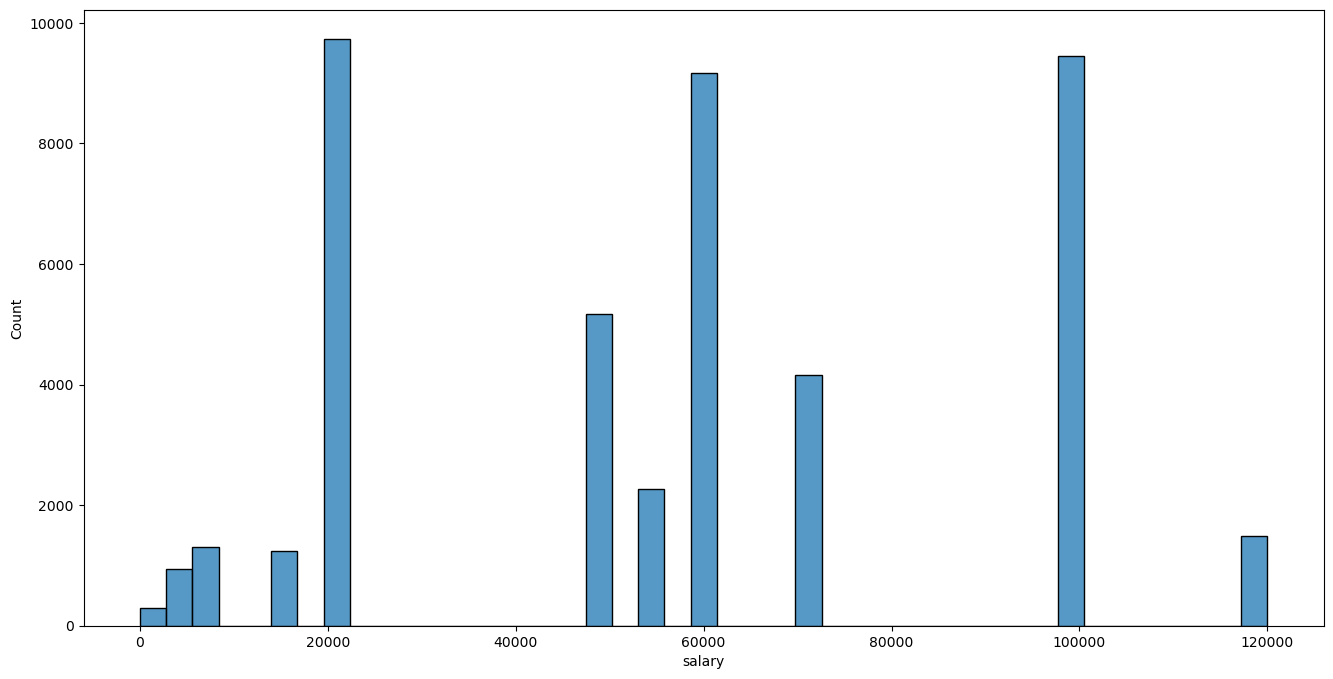

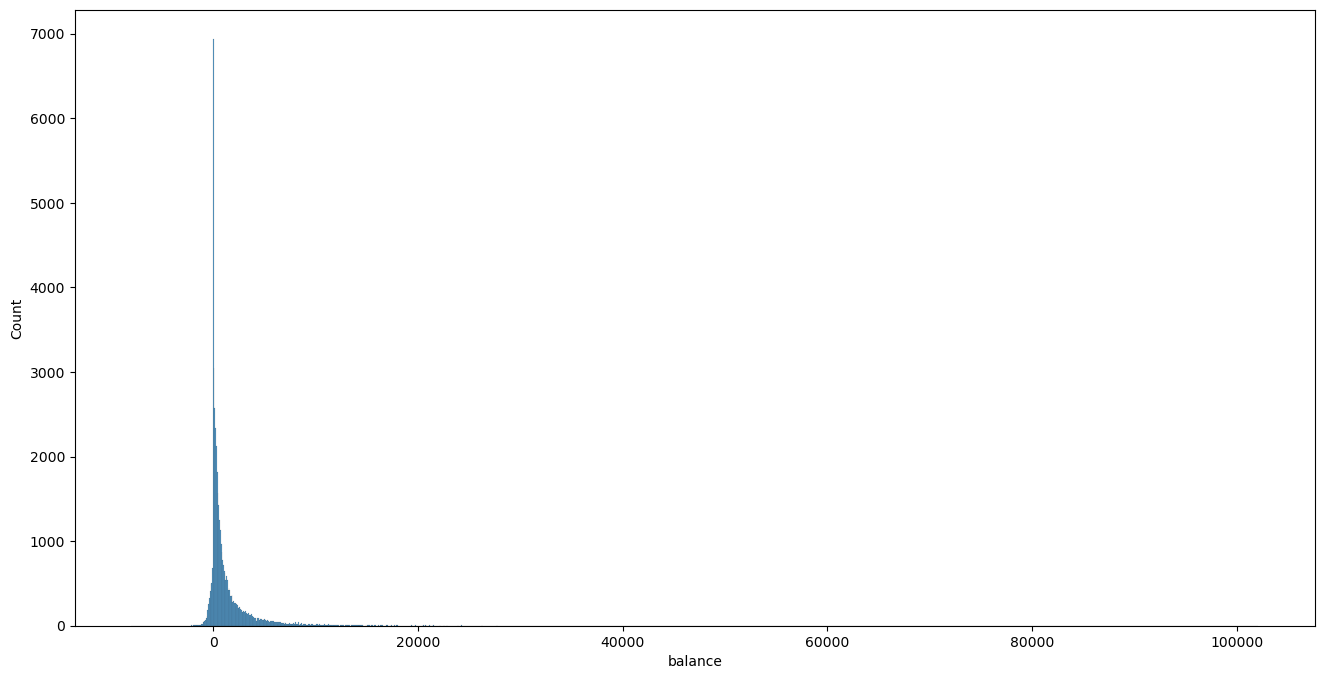

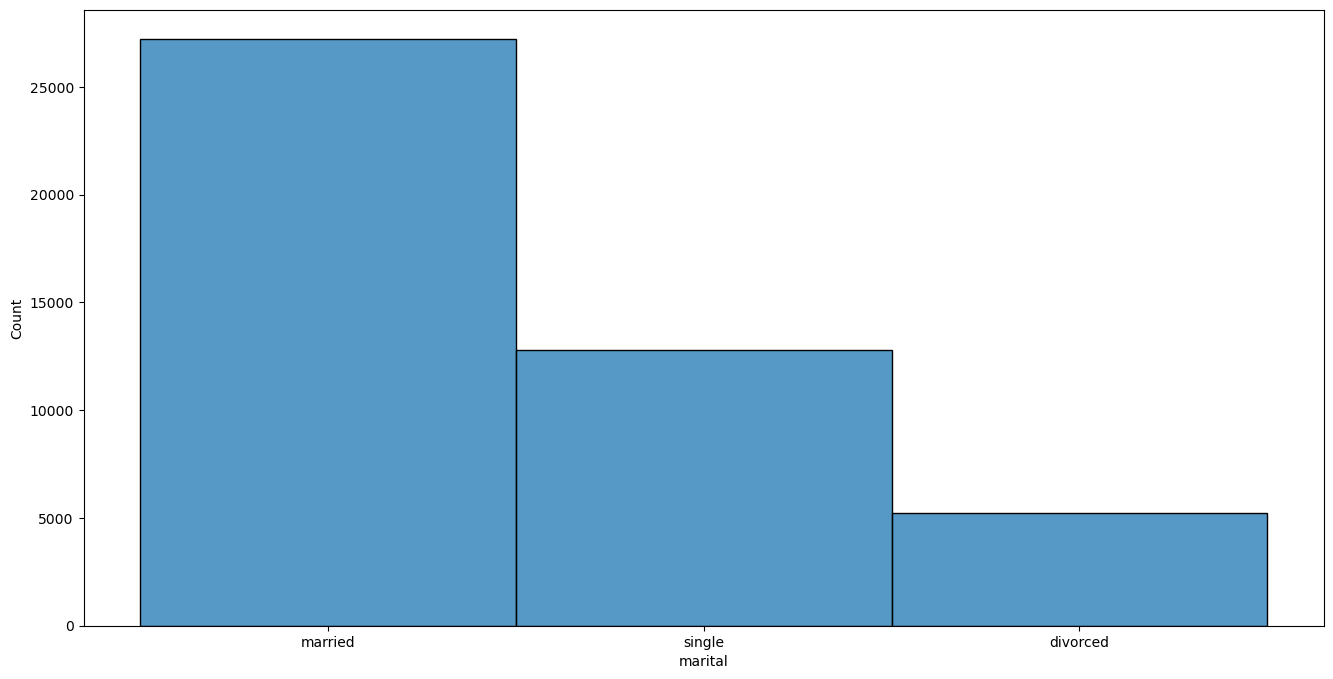

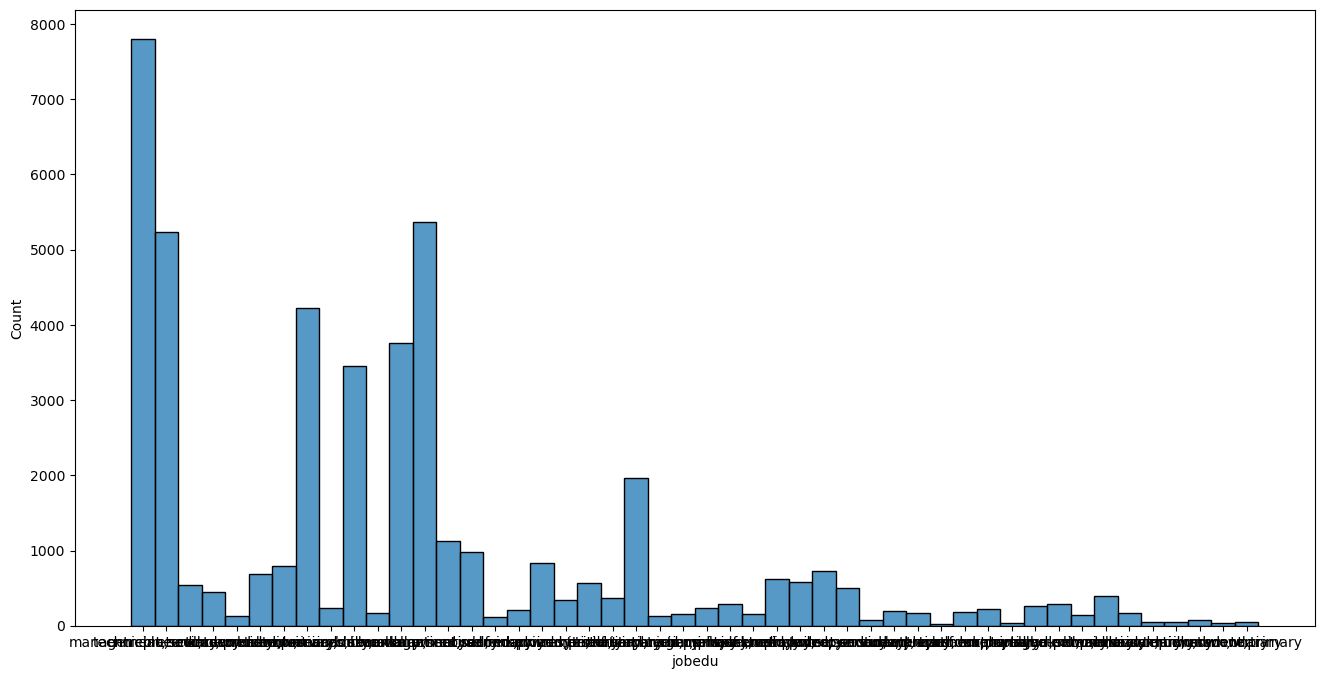

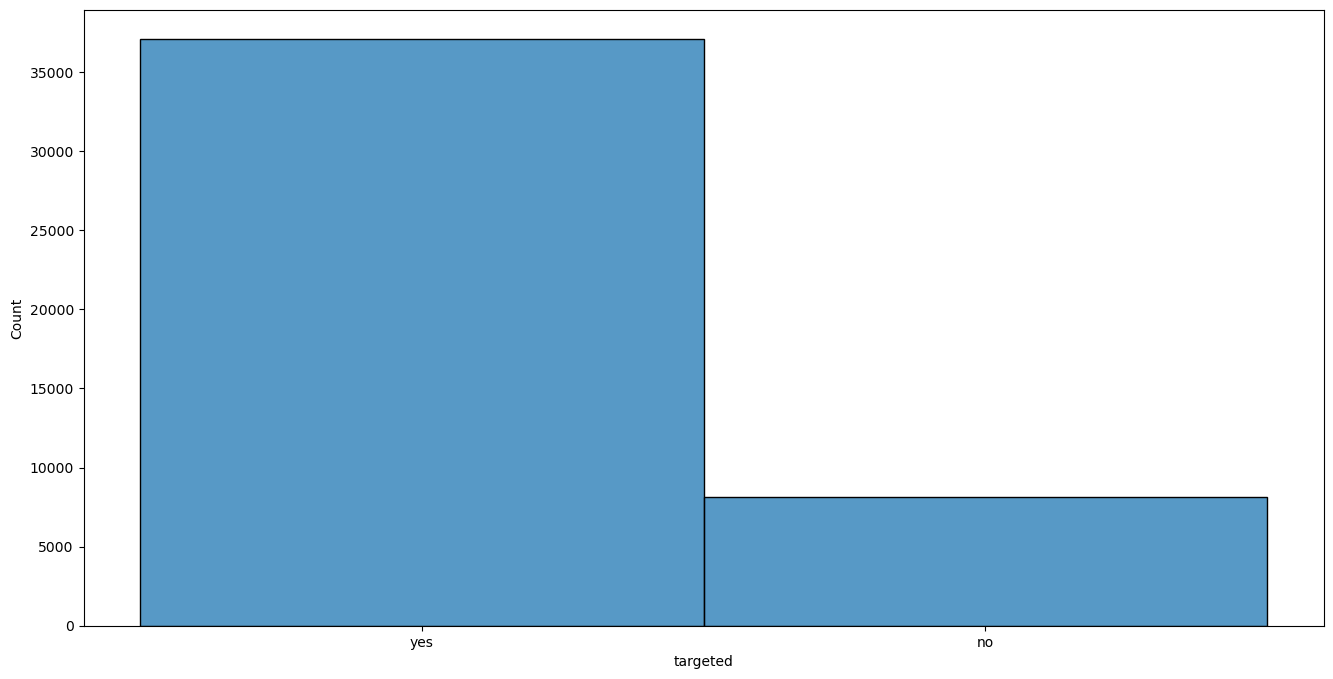

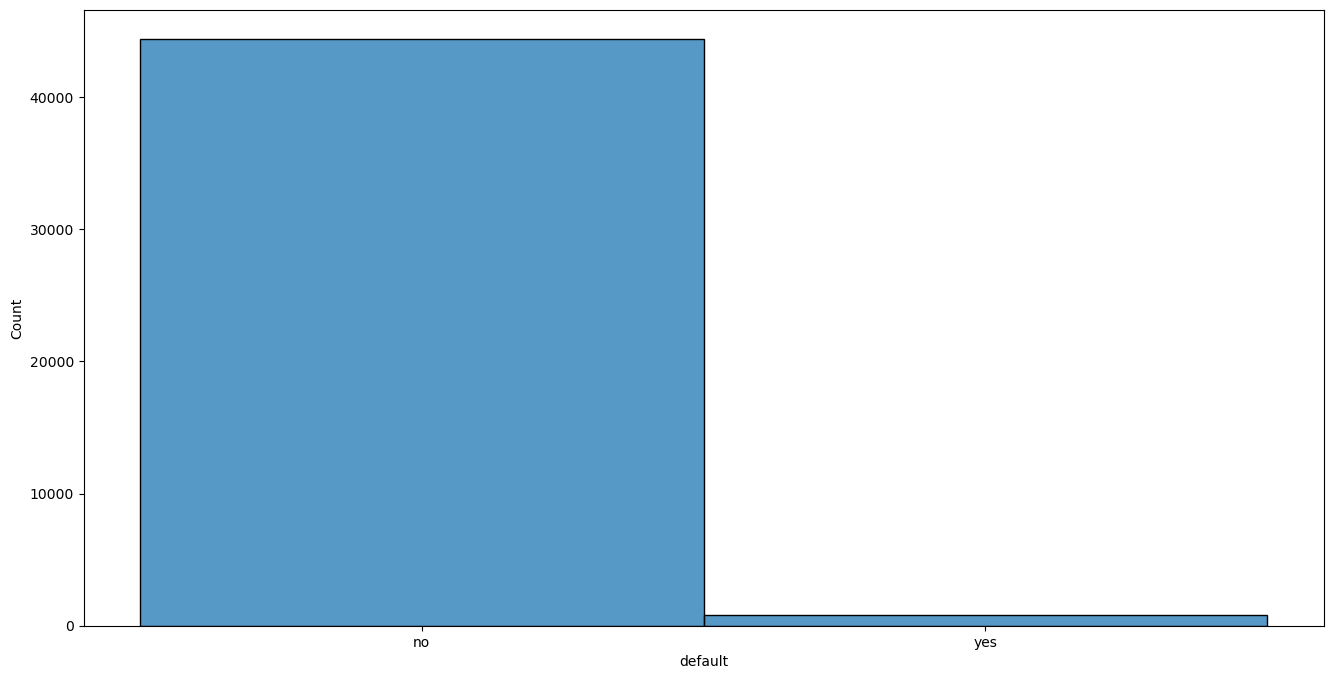

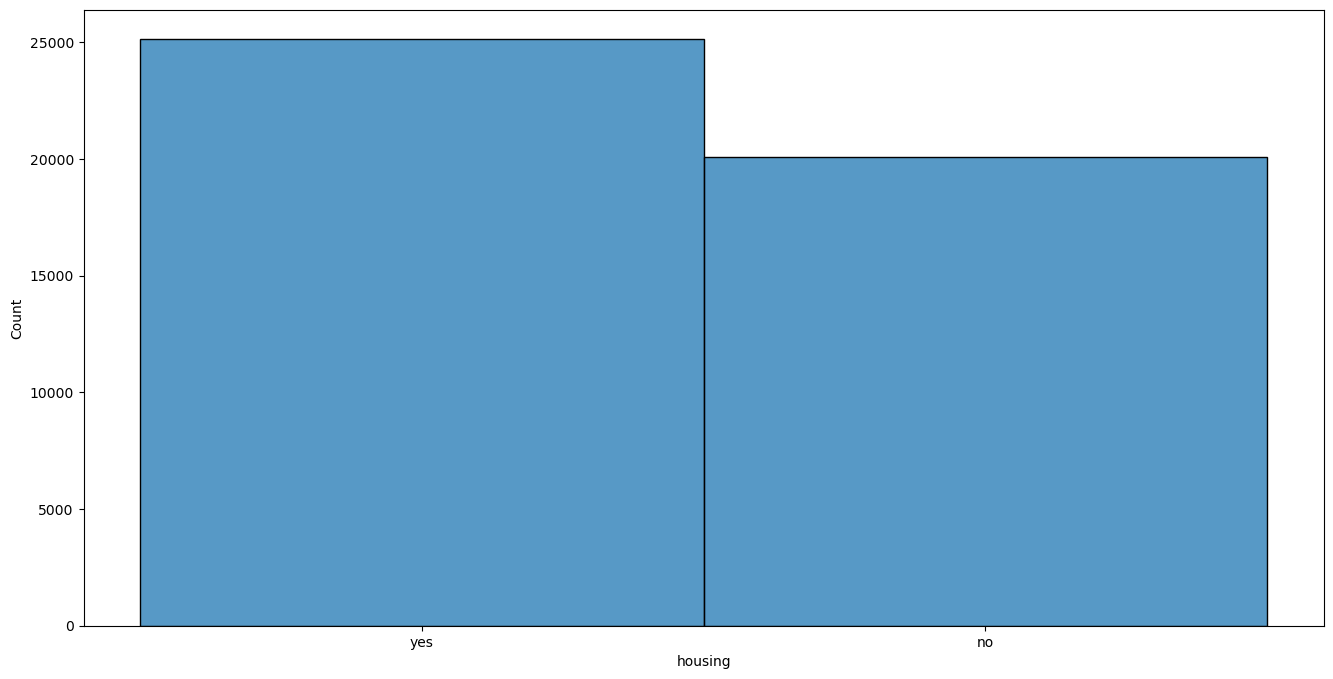

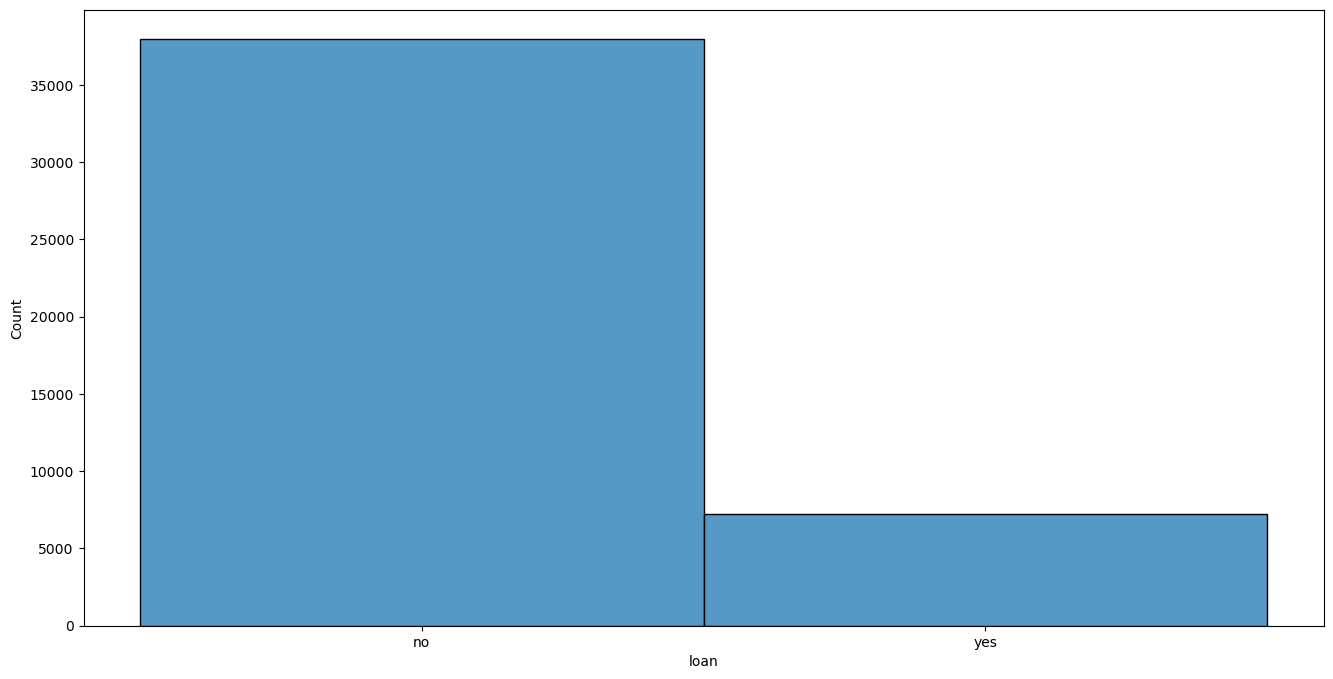

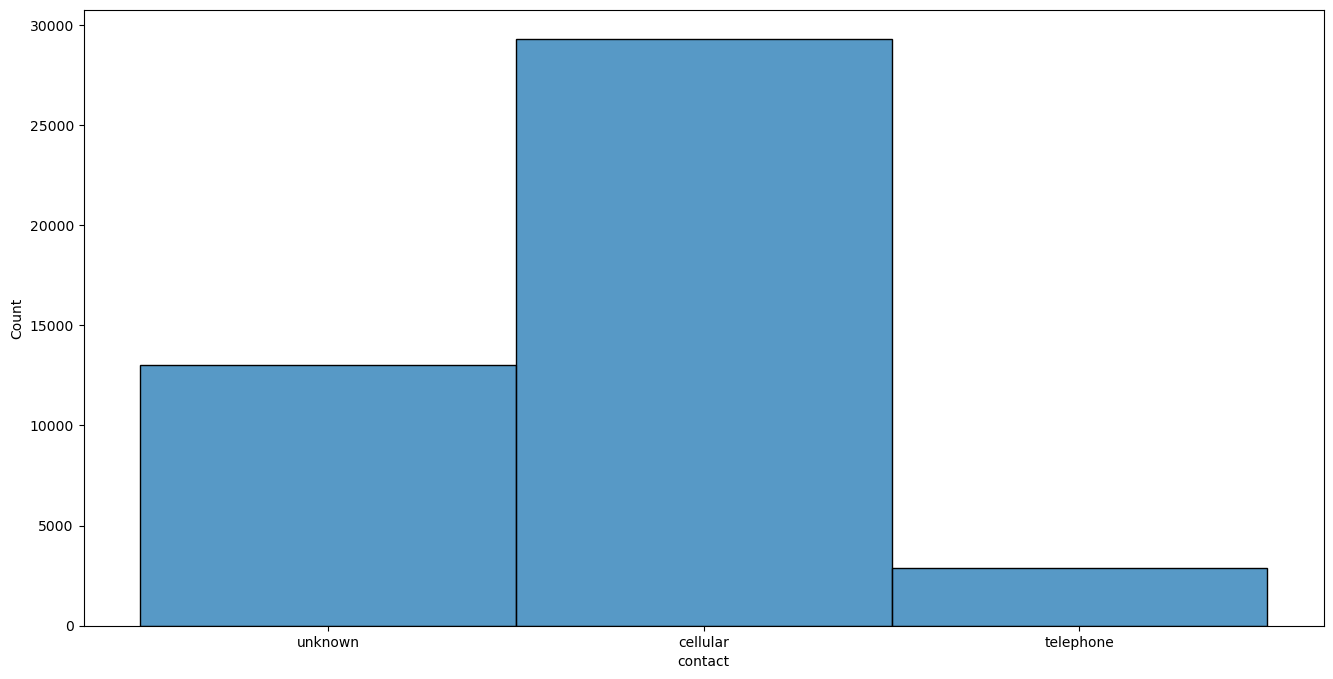

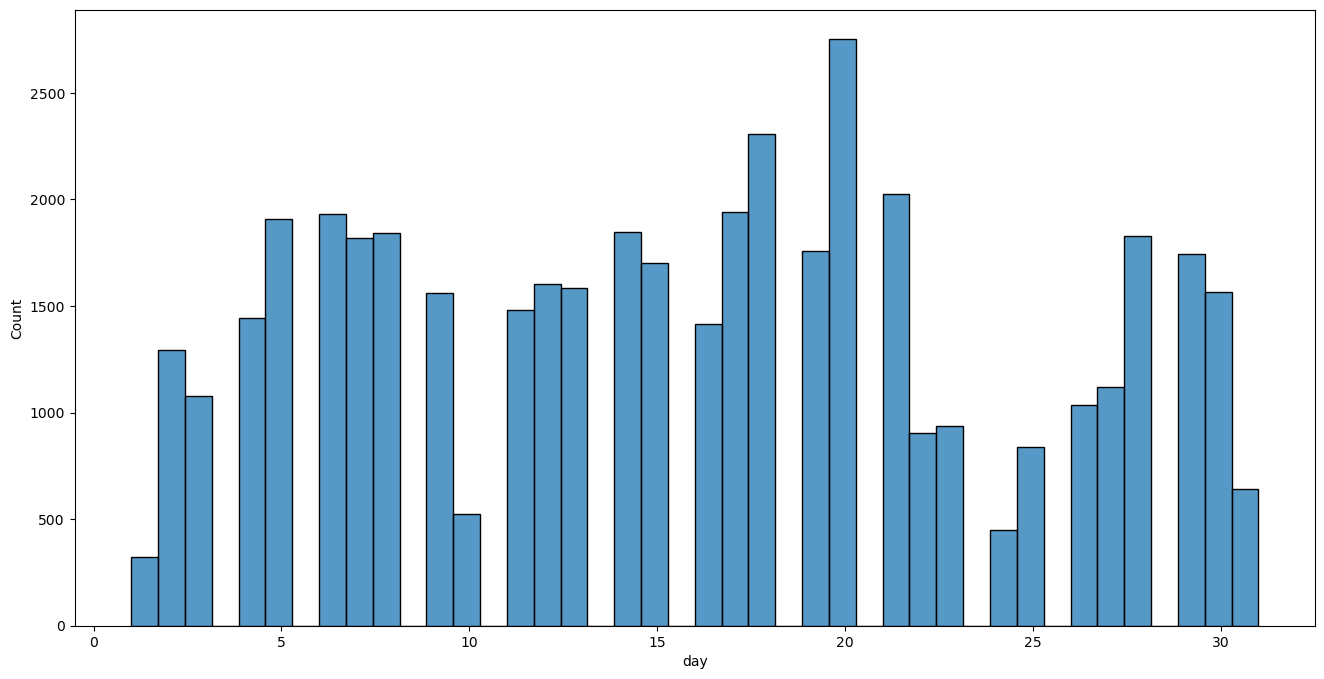

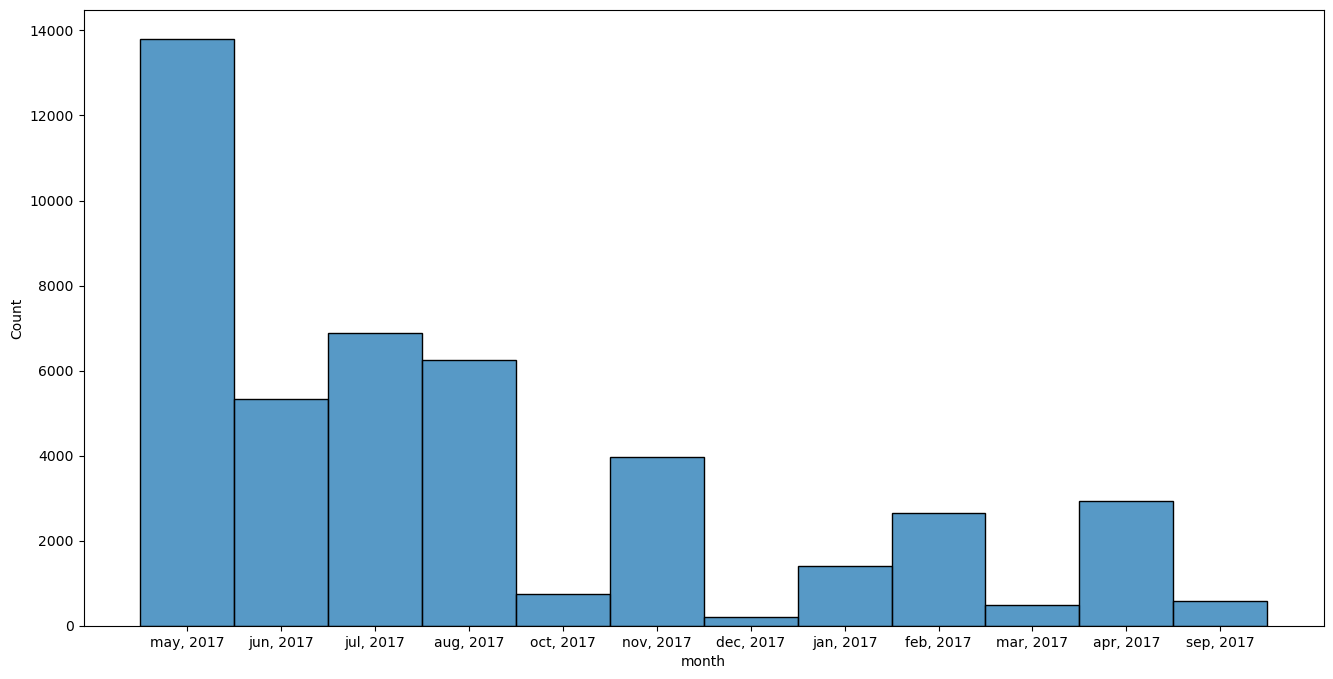

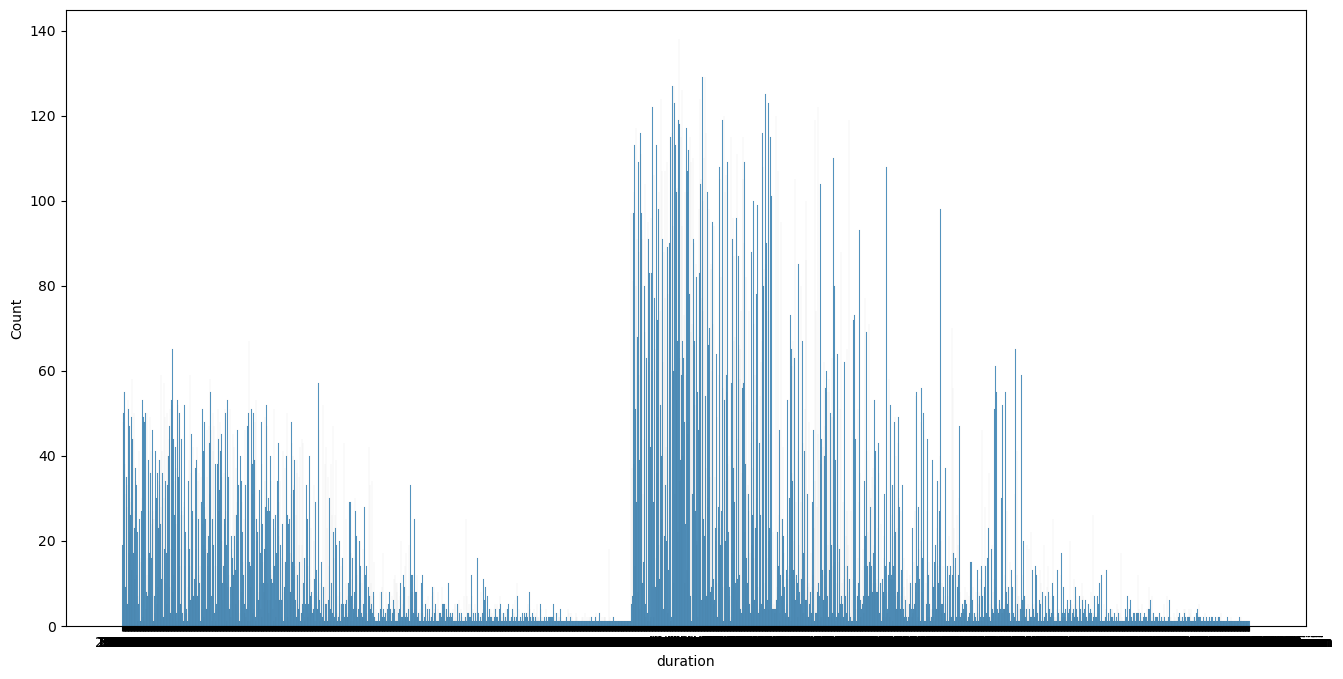

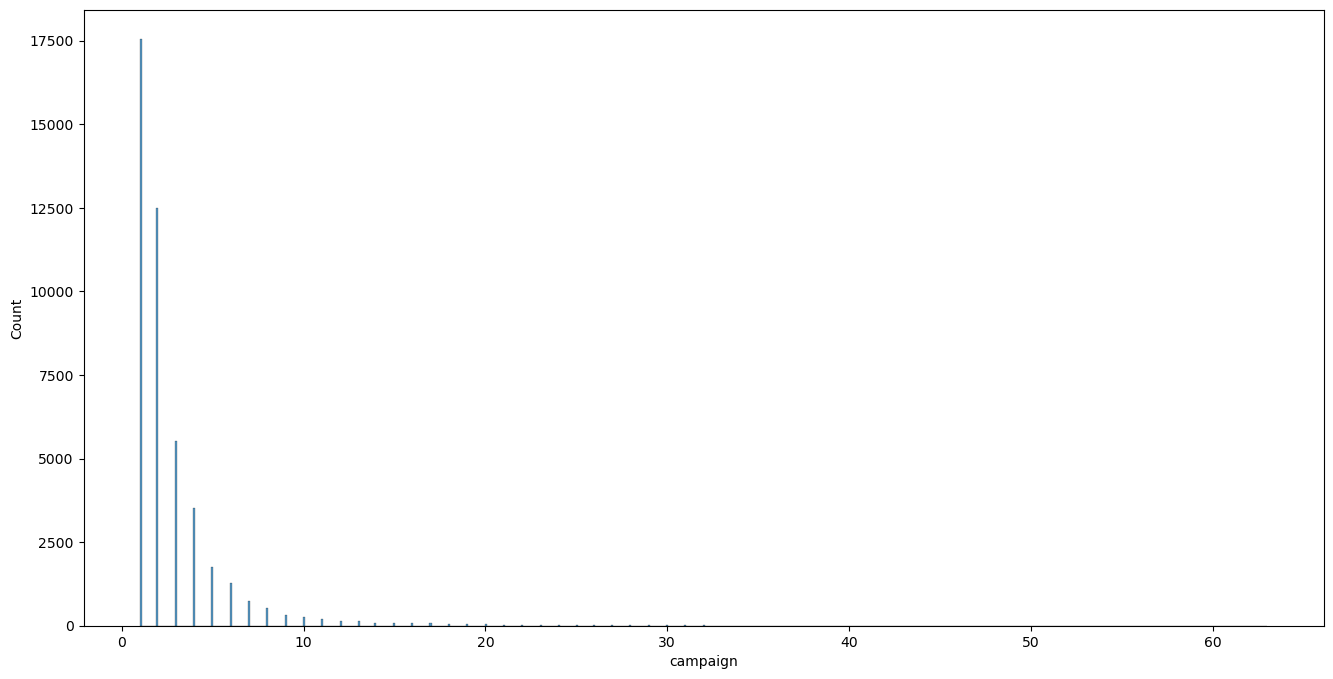

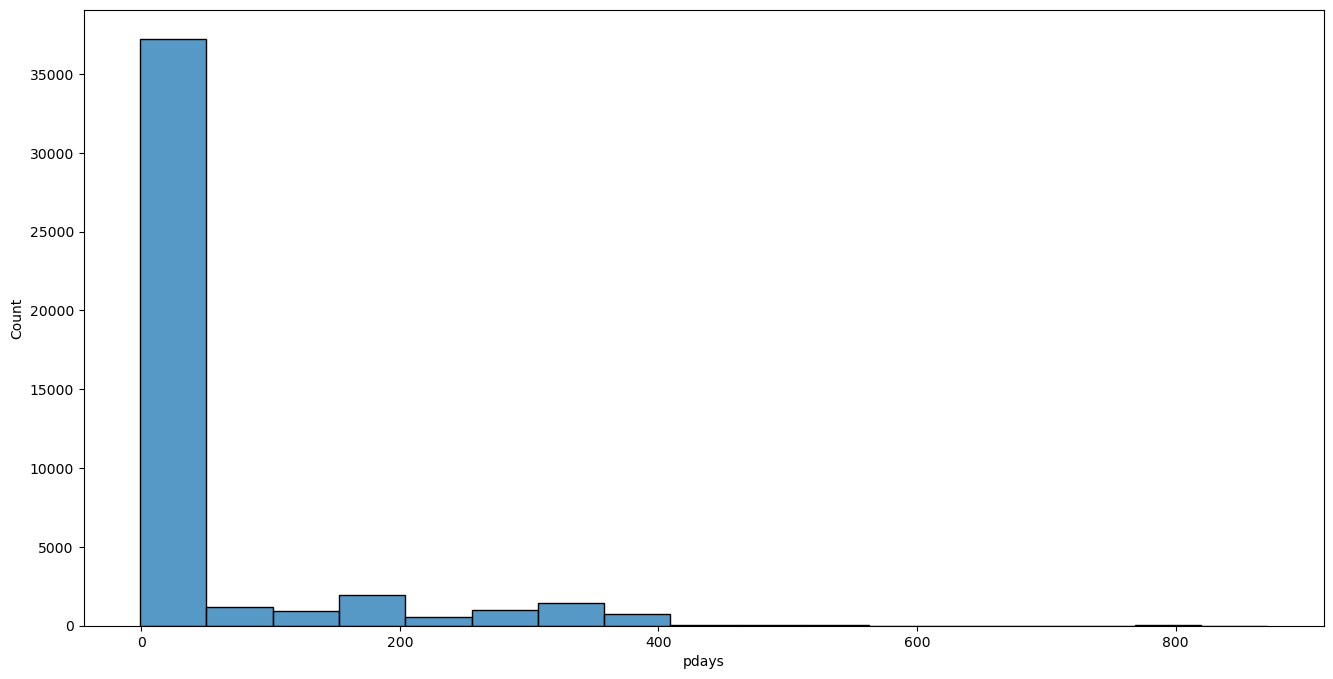

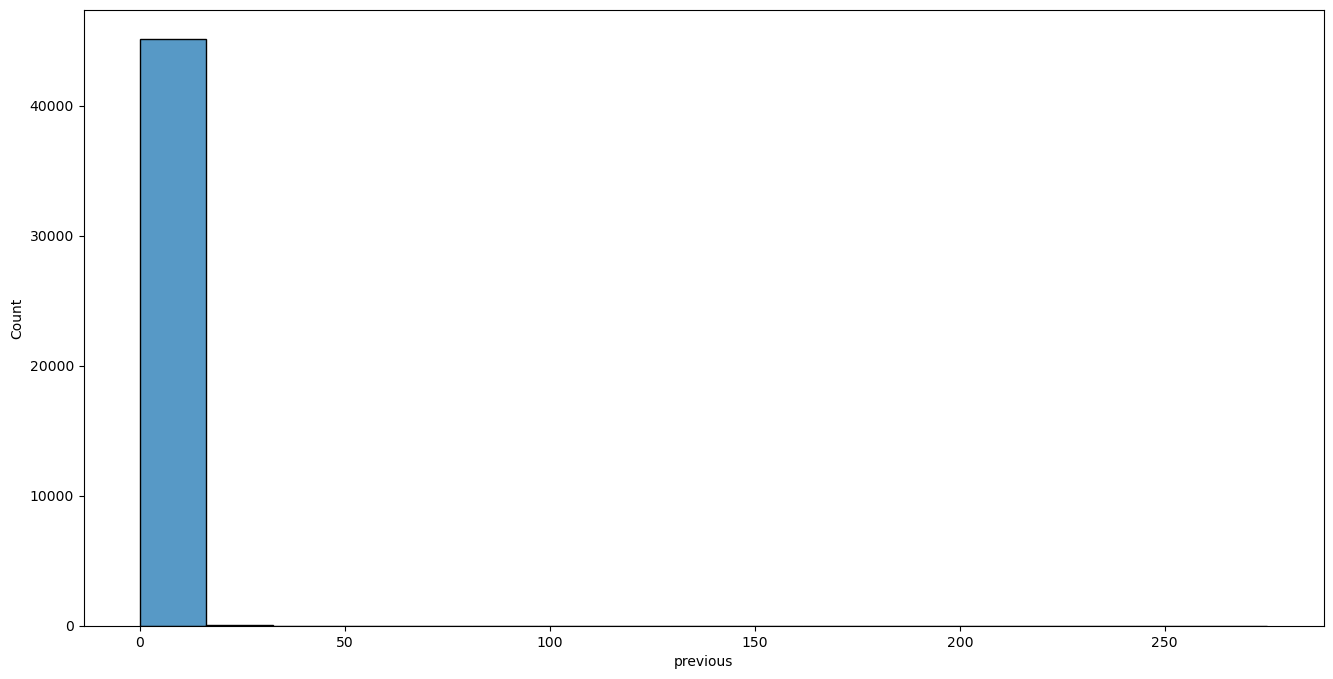

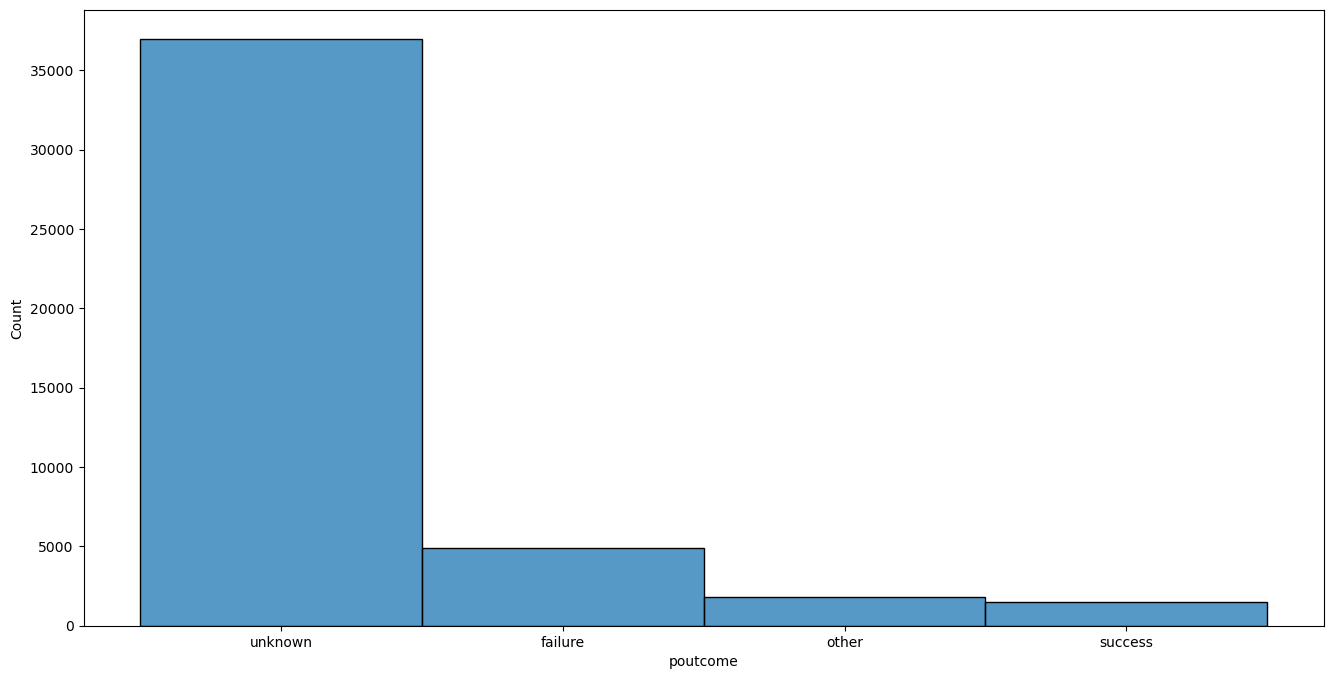

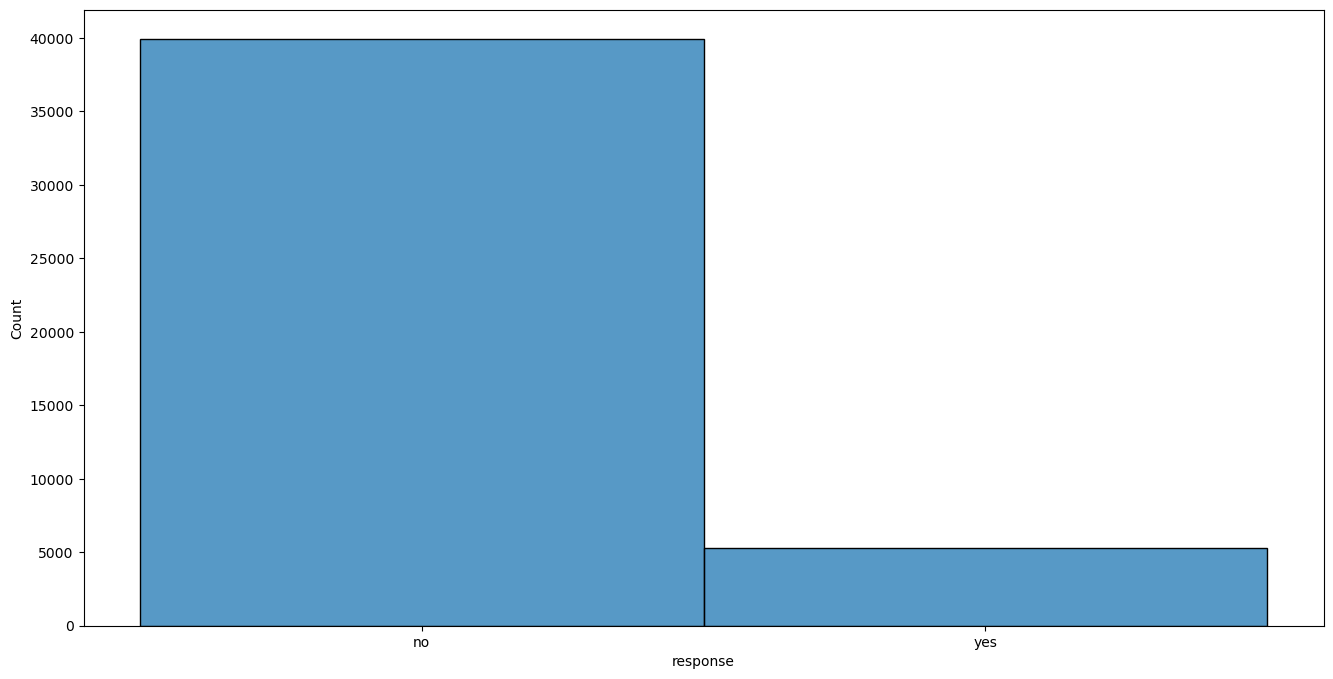

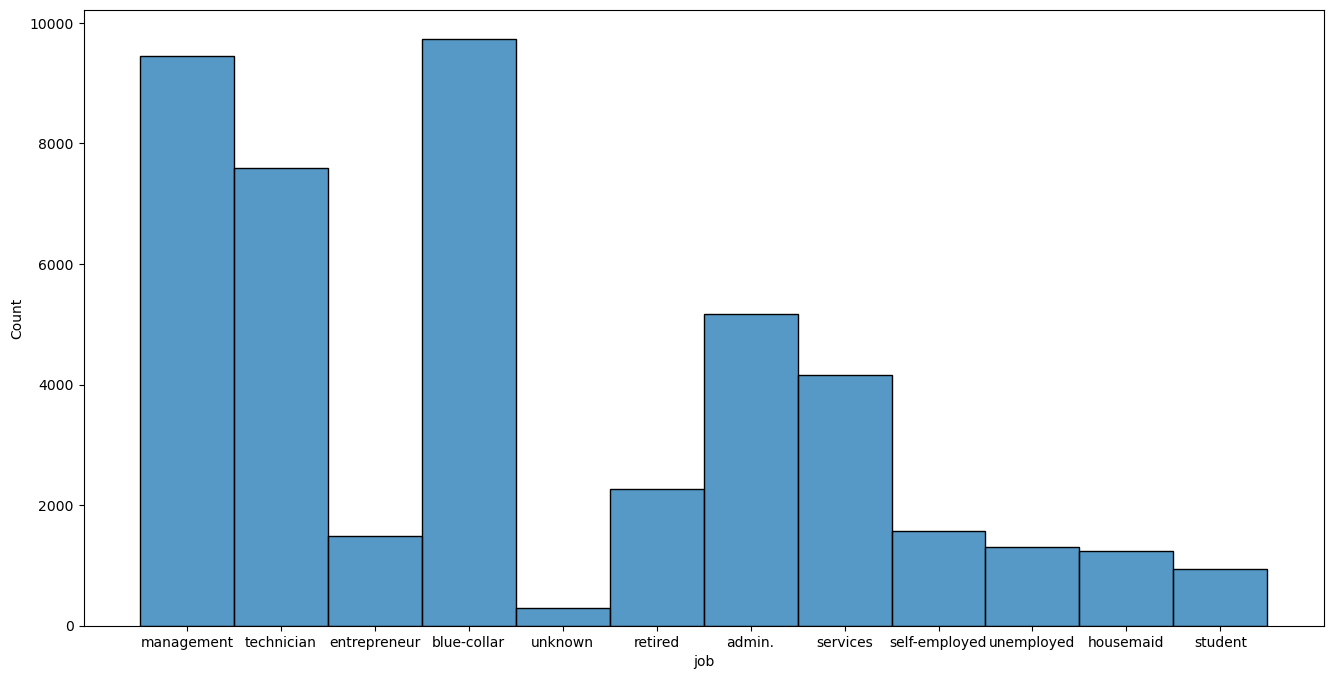

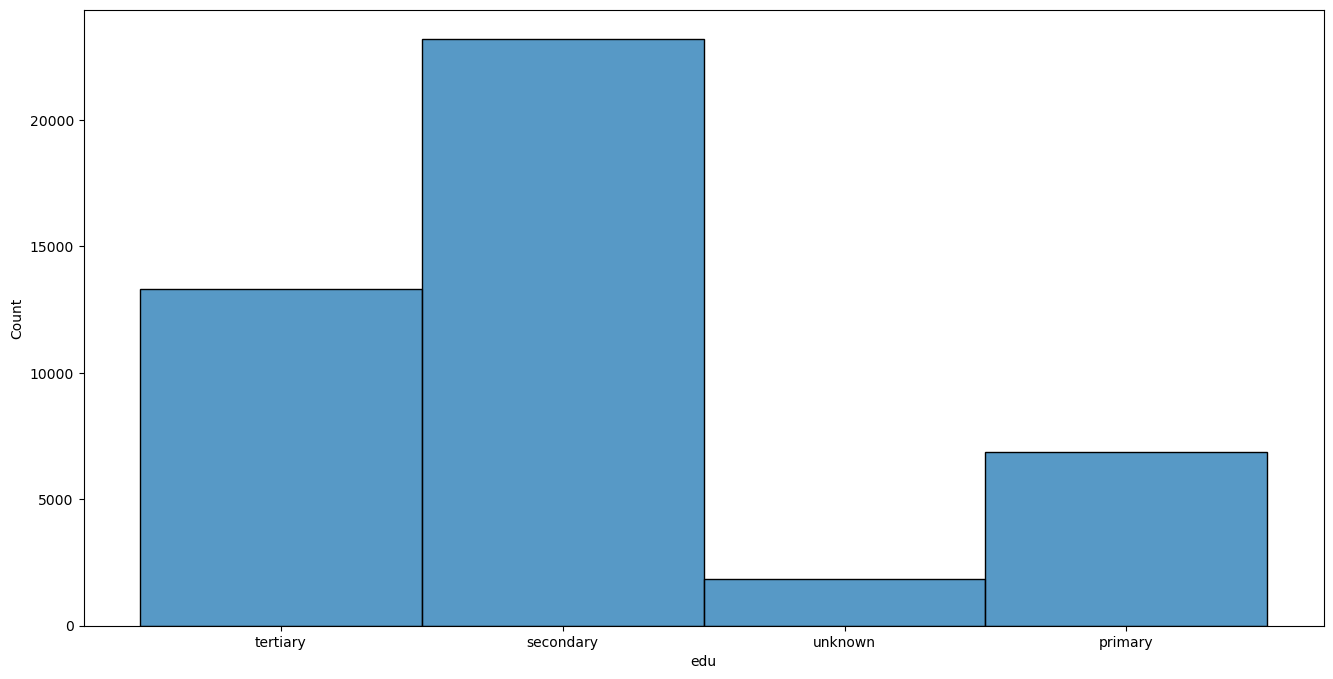

In [35]:
for i in Bank:
    plt.figure(figsize=(16,8))
    sns.histplot(x=i,data=Bank)
    plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


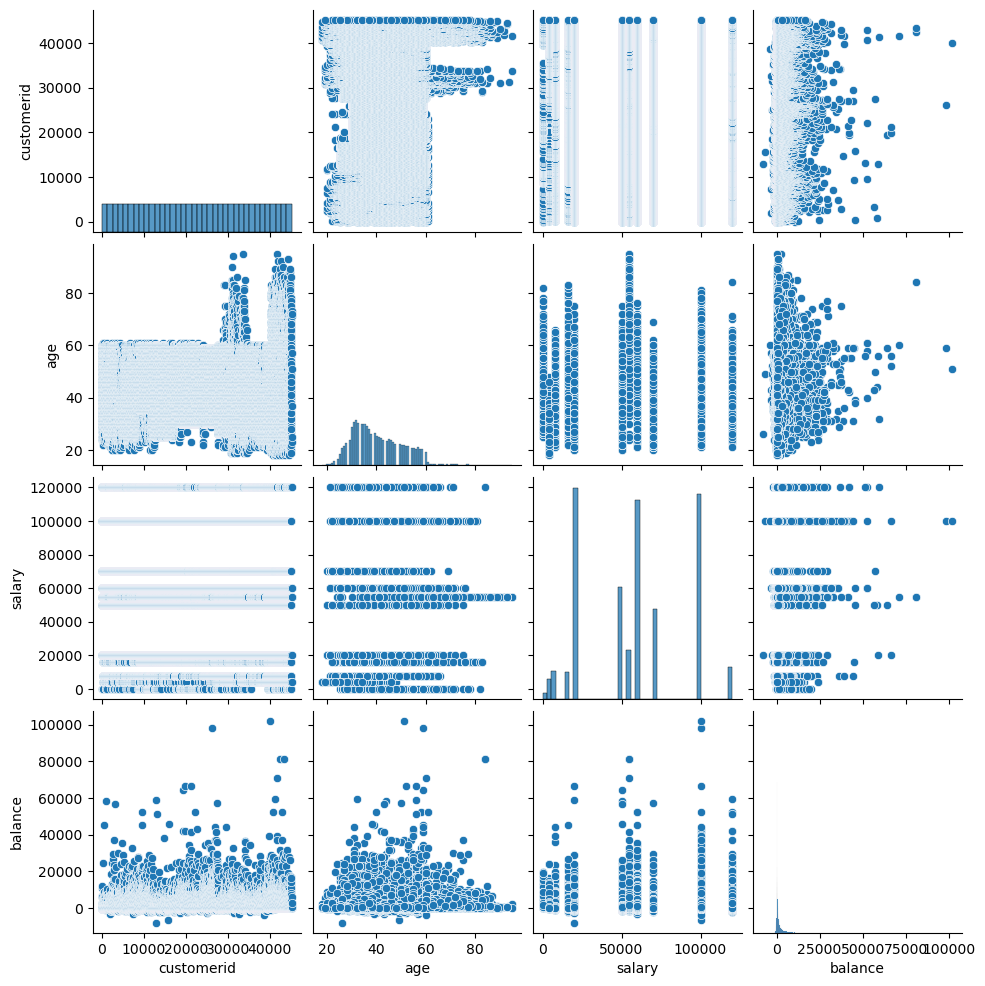

In [36]:
sns.pairplot(Bank.iloc[:,0:4])

In [37]:
Bank['salary'].skew()

0.13782909379095207

In [38]:
Bank['balance'].kurt()

140.75154662504158

<Axes: xlabel='age', ylabel='salary'>

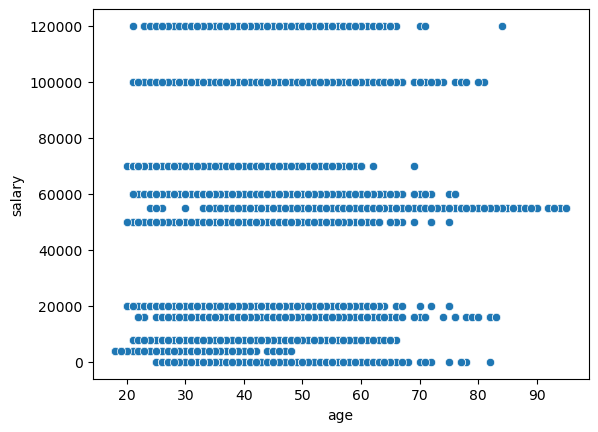

In [39]:
sns.scatterplot(x='age',y='salary',data=Bank)

<Axes: xlabel='campaign', ylabel='pdays'>

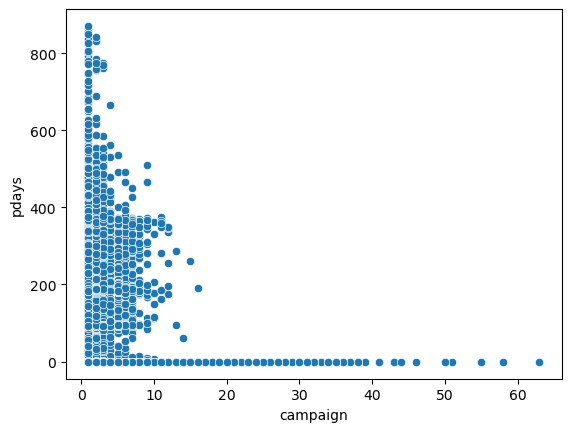

In [40]:
sns.scatterplot(x='campaign',y='pdays',data=Bank)

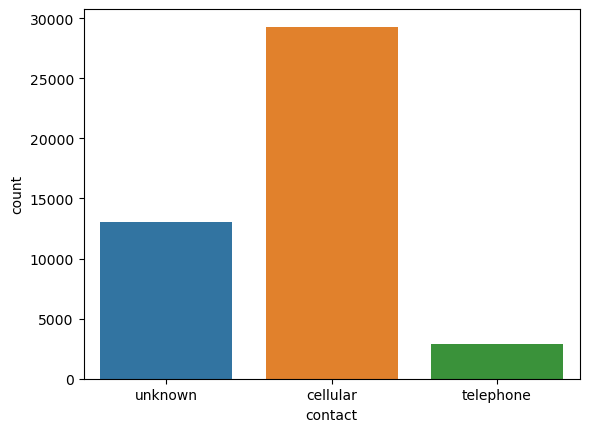

In [41]:
sns.countplot(x='contact',data=Bank)
plt.show()

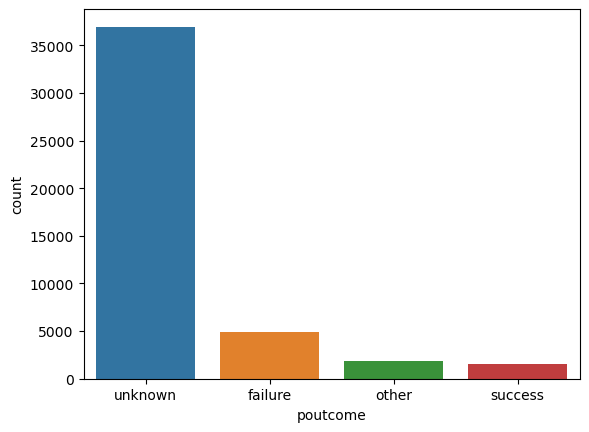

In [42]:
sns.countplot(x='poutcome',data=Bank)
plt.show()

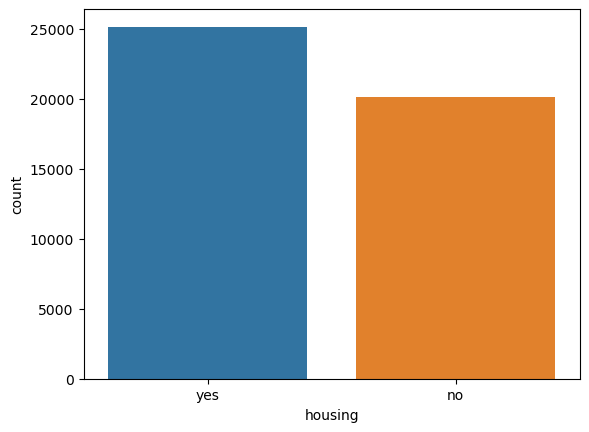

In [43]:
sns.countplot(x='housing',data=Bank)
plt.show()

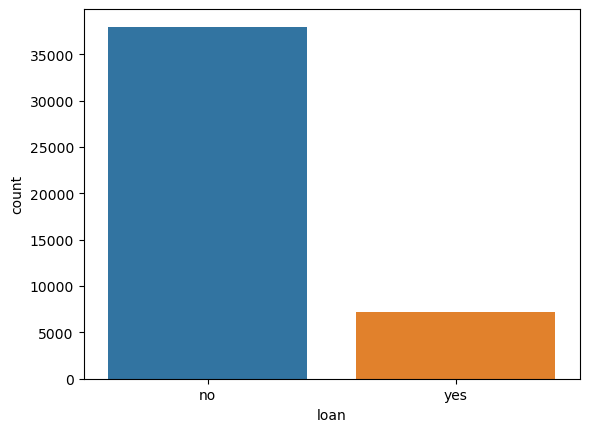

In [44]:
sns.countplot(x='loan',data=Bank)
plt.show()

<Axes: xlabel='default', ylabel='count'>

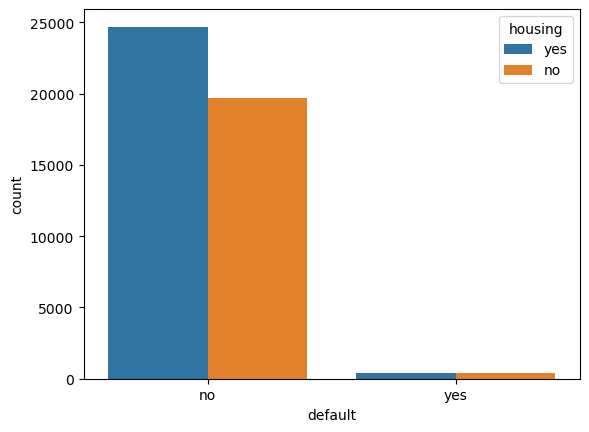

In [45]:
sns.countplot(x="default",data=Bank,hue='housing')

<Axes: xlabel='default', ylabel='count'>

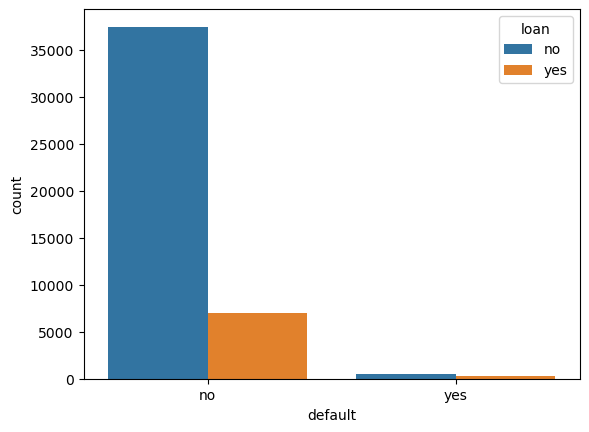

In [46]:
sns.countplot(x="default",data=Bank,hue='loan')

<Axes: ylabel='Sucess of loan with respect to h '>

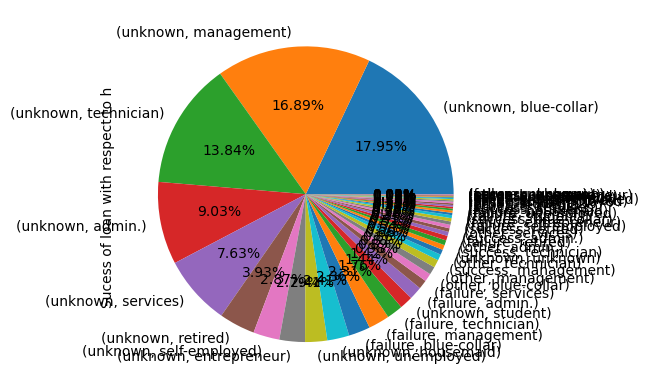

In [47]:
Bank[['poutcome','job']].value_counts().plot.pie(ylabel='Sucess of loan with respect to h ',autopct='%.2f%%')

<Axes: ylabel='Sucess of loan with respect to marital status '>

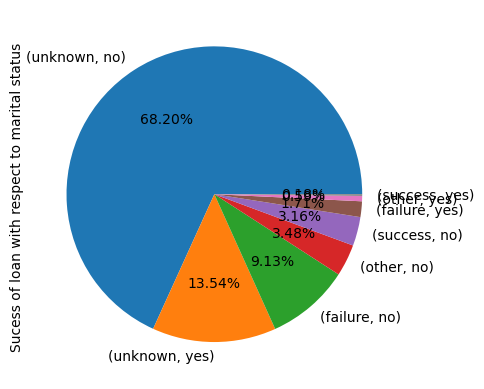

In [48]:
Bank[['poutcome','loan']].value_counts().plot.pie(ylabel='Sucess of loan with respect to marital status ',autopct='%.2f%%')

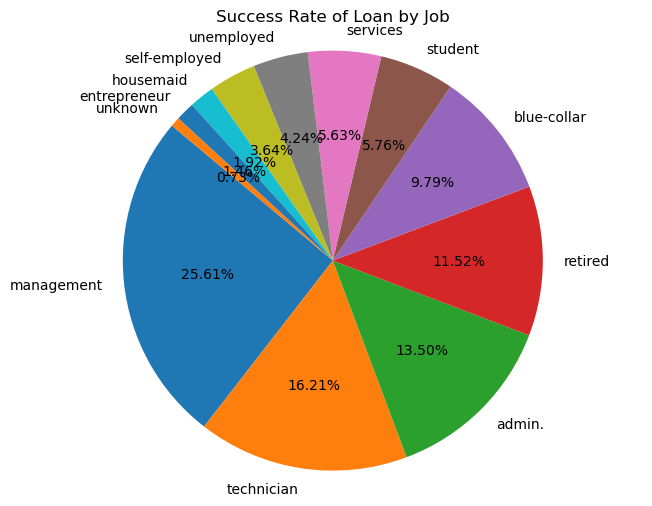

In [49]:
success_data = Bank[Bank['poutcome'] == 'success']
job_counts = success_data['job'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(job_counts, labels=job_counts.index, autopct='%.2f%%', startangle=140)
plt.title('Success Rate of Loan by Job')  
plt.ylabel('')  
plt.axis('equal')  

plt.show()


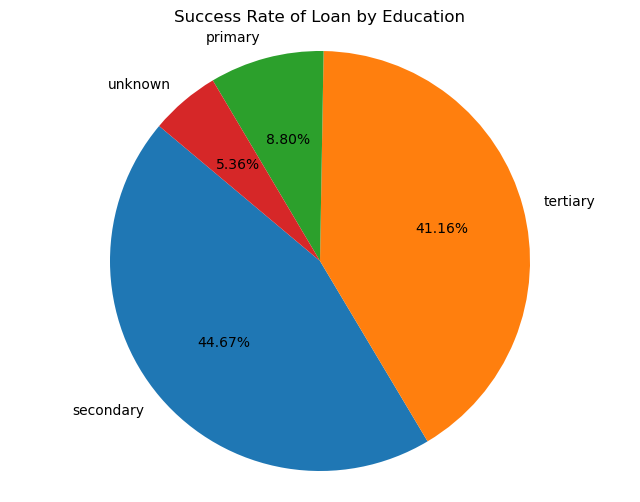

In [50]:
success_data = Bank[Bank['poutcome'] == 'success']
edu_counts = success_data['edu'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(edu_counts, labels=edu_counts.index, autopct='%.2f%%', startangle=140)
plt.title('Success Rate of Loan by Education')  
plt.ylabel('')  
plt.axis('equal')  

plt.show()


<Axes: >

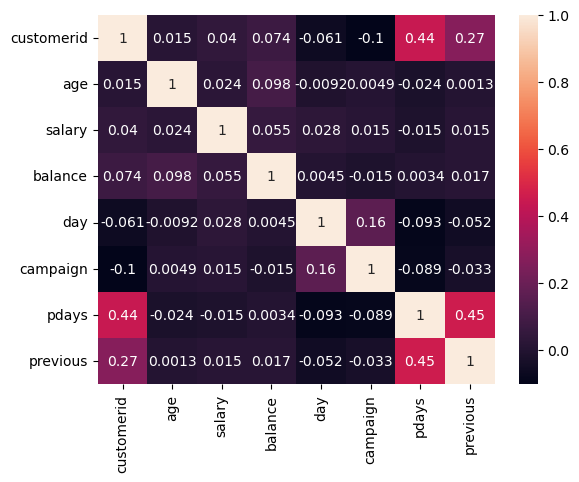

In [51]:
sns.heatmap(Bank.corr(numeric_only=True),annot=True)

In [52]:
def minutes_to_seconds(duration):
    if 'min' in duration:
        minutes = float(duration.split()[0])  
        return int(minutes * 60)  
    else:
        return duration
    
Bank['duration'] = Bank['duration'].apply(minutes_to_seconds)





In [53]:
Bank

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan  ... day      month duration campaign  \
0          yes      no     yes   no  ...   5  may, 2017  261 sec        1   
1          yes      no     yes   no  ...   5  may, 2017  151 sec        1   
2          yes      no     yes  yes  ...   5  may, 2017   76 sec        1   
3           no      no     yes   no  ...   5  may, 2017   92 sec        1   
4           no      no      no   no  ...   5  may, 2017  198 sec        1   
...        ...     ...     ...  ...  ...  ..        ...      ...      ...   
45206      yes      no      no   no  ...  17  nov, 2017      976        3   
45207      yes      no      no   no  ...  17  nov, 2017      456        2   
45208      yes      no      no   no  ...  17  nov, 2017     1126        5   
45209      yes      no      no   no  ...  17  nov, 2017      508        4   
45210      yes      no      no   no  ...  17  nov, 2017      361        2   

       pdays  previous  poutcome response           job        edu  
0         -1         0   unknown       no    management   tertiary  
1         -1         0   unknown       no    technician  secondary  
2         -1         0   unknown       no  entrepreneur  secondary  
3         -1         0   unknown       no   blue-collar    unknown  
4         -1         0   unknown       no       unknown    unknown  
...      ...       ...       ...      ...           ...        ...  
45206     -1         0   unknown      yes    technician   tertiary  
45207     -1         0   unknown      yes       retired    primary  
45208    184         3   success      yes       retired  secondary  
45209     -1         0   unknown       no   blue-collar  secondary  
45210    188        11     other       no  entrepreneur  secondary  

[45211 rows x 21 columns]

In [54]:
fig=px.line(Bank,x='contact',y='duration')
fig.show()

In [55]:
Bank

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan  ... day      month duration campaign  \
0          yes      no     yes   no  ...   5  may, 2017  261 sec        1   
1          yes      no     yes   no  ...   5  may, 2017  151 sec        1   
2          yes      no     yes  yes  ...   5  may, 2017   76 sec        1   
3           no      no     yes   no  ...   5  may, 2017   92 sec        1   
4           no      no      no   no  ...   5  may, 2017  198 sec        1   
...        ...     ...     ...  ...  ...  ..        ...      ...      ...   
45206      yes      no      no   no  ...  17  nov, 2017      976        3   
45207      yes      no      no   no  ...  17  nov, 2017      456        2   
45208      yes      no      no   no  ...  17  nov, 2017     1126        5   
45209      yes      no      no   no  ...  17  nov, 2017      508        4   
45210      yes      no      no   no  ...  17  nov, 2017      361        2   

       pdays  previous  poutcome response           job        edu  
0         -1         0   unknown       no    management   tertiary  
1         -1         0   unknown       no    technician  secondary  
2         -1         0   unknown       no  entrepreneur  secondary  
3         -1         0   unknown       no   blue-collar    unknown  
4         -1         0   unknown       no       unknown    unknown  
...      ...       ...       ...      ...           ...        ...  
45206     -1         0   unknown      yes    technician   tertiary  
45207     -1         0   unknown      yes       retired    primary  
45208    184         3   success      yes       retired  secondary  
45209     -1         0   unknown       no   blue-collar  secondary  
45210    188        11     other       no  entrepreneur  secondary  

[45211 rows x 21 columns]

<Axes: xlabel='month', ylabel='count'>

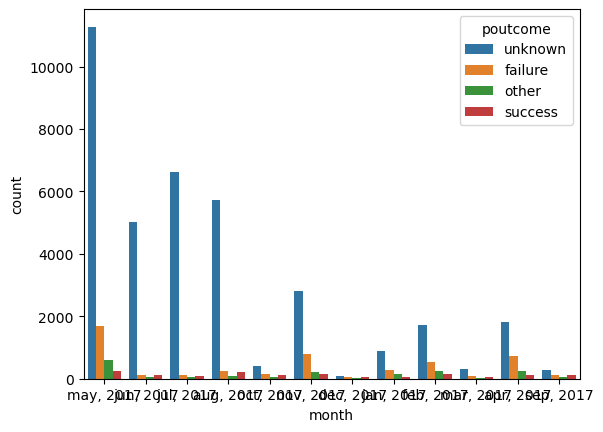

In [56]:
sns.countplot(x='month',hue='poutcome',data=Bank)

<Axes: xlabel='poutcome', ylabel='count'>

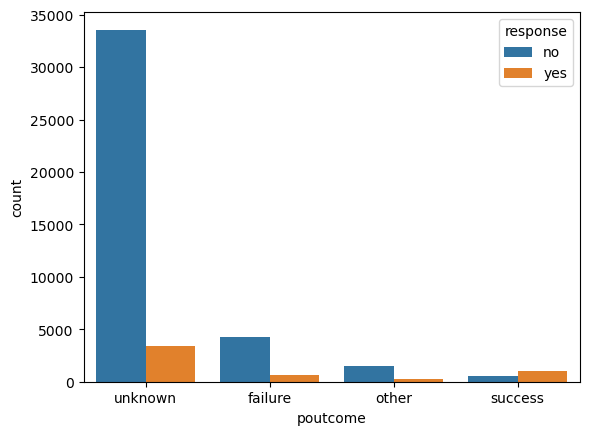

In [57]:
sns.countplot(x="poutcome",data=Bank,hue='response')

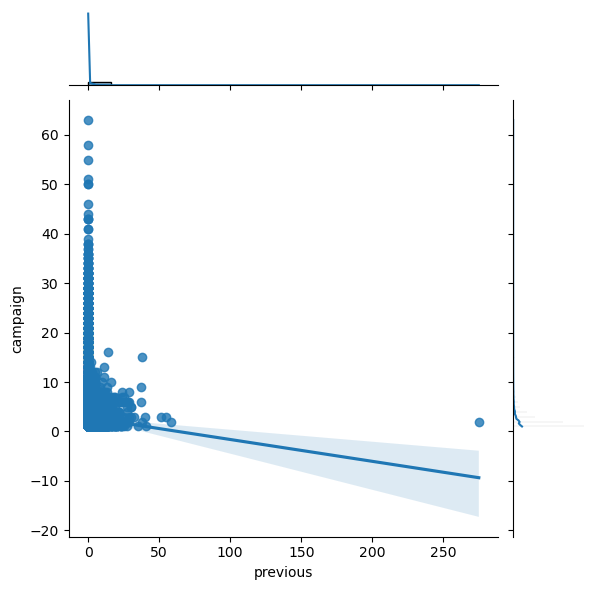

In [58]:
sns.jointplot(x='previous',y='campaign',data=Bank,kind='reg')

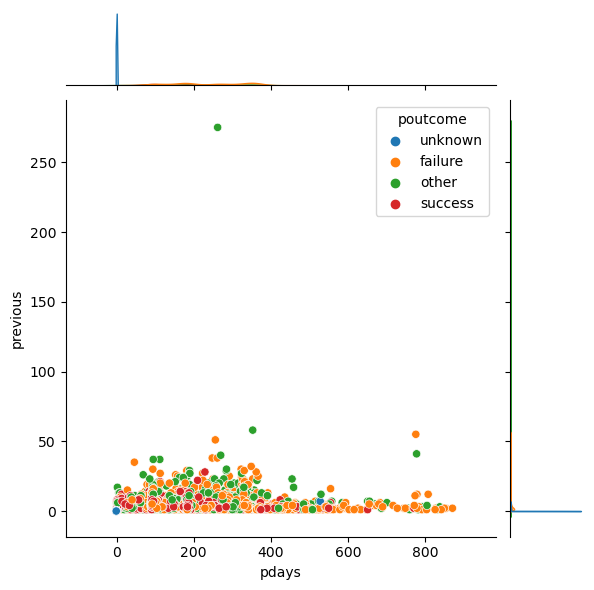

In [59]:
sns.jointplot(x='pdays',y='previous',hue='poutcome',data=Bank)

<Axes: xlabel='targeted', ylabel='count'>

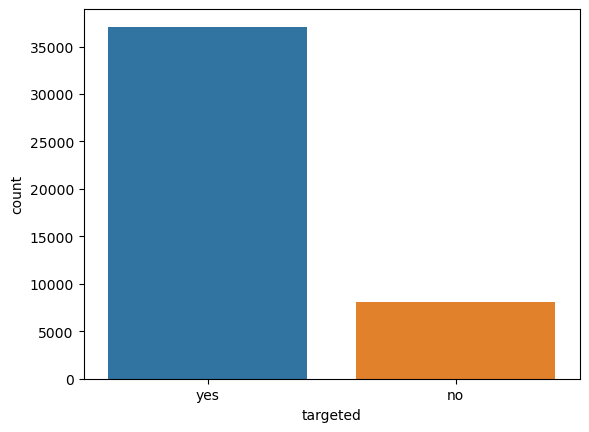

In [60]:
sns.countplot(x="targeted",data=Bank)

In [61]:
Bank['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [62]:
Bank.groupby("targeted")["poutcome"].value_counts()

targeted  poutcome
no        unknown      6476
          failure       898
          success       409
          other         337
yes       unknown     30483
          failure      4003
          other        1503
          success      1102
Name: count, dtype: int64

In [63]:
Bank.groupby("default")["housing"].value_counts()

default  housing
no       yes        24695
         no         19701
yes      yes          435
         no           380
Name: count, dtype: int64

In [64]:
Bank.groupby("month")["poutcome"].value_counts()

month      poutcome
apr, 2017  unknown      1814
           failure       736
           other         252
           success       129
aug, 2017  unknown      5710
           failure       237
           success       207
           other          86
dec, 2017  unknown        96
           success        51
           failure        41
           other          26
feb, 2017  unknown      1723
           failure       529
           other         252
           success       142
jan, 2017  unknown       904
           failure       289
           other         145
           success        64
jul, 2017  unknown      6635
           failure       109
           success        98
           other          46
jun, 2017  unknown      5014
           failure       133
           success       118
           other          70
mar, 2017  unknown       304
           failure        75
           success        59
           other          38
may, 2017  unknown     11277
           failure     

In [65]:
Bank.groupby("targeted")["response"].value_counts()

targeted  response
no        no           6786
          yes          1334
yes       no          33138
          yes          3953
Name: count, dtype: int64

In [66]:
Bank.groupby("poutcome")["customerid"].value_counts()

poutcome  customerid
failure   24061         1
          24065         1
          33406         1
          33201         1
          33202         1
                       ..
unknown   6821          1
          6822          1
          6823          1
          6824          1
          45210         1
Name: count, Length: 45211, dtype: int64

In [67]:
Bank.groupby("default")["loan"].value_counts()

default  loan
no       no      37453
         yes      6943
yes      no        514
         yes       301
Name: count, dtype: int64

<Axes: xlabel='previous', ylabel='count'>

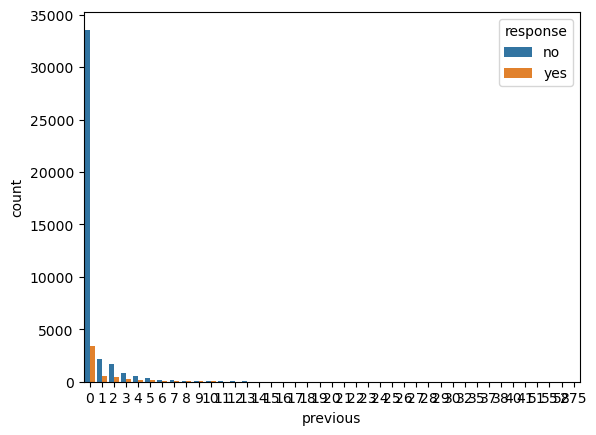

In [68]:
sns.countplot(x="previous",data=Bank,hue='response')